<a href="https://colab.research.google.com/github/JoannaDeszcz/MACHINE-LEARINING/blob/main/Algorytmy_grupuj%C4%85ce_(dane_liczbowe).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importowanie bibliotek

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


import warnings
warnings.filterwarnings('ignore')

#### Zadanie 2

2. EDA (Exploratory Data Analysis):


	2.1. Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą kolumny 'Channel'.


In [ ]:
dane=pd.read_csv('Wholesale customers data.csv')

dane.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


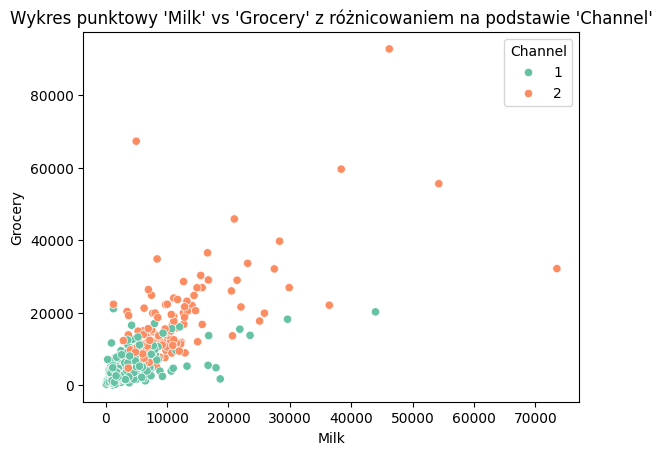

In [ ]:
sns.scatterplot( data=dane,x='Milk', y='Grocery', hue='Channel',palette='Set2')
plt.title("Wykres punktowy 'Milk' vs 'Grocery' z różnicowaniem na podstawie 'Channel'")
plt.show()

	2.2. Utworzenie histogramu wydatków na mleko na podstawie kolumny 'Channel'.


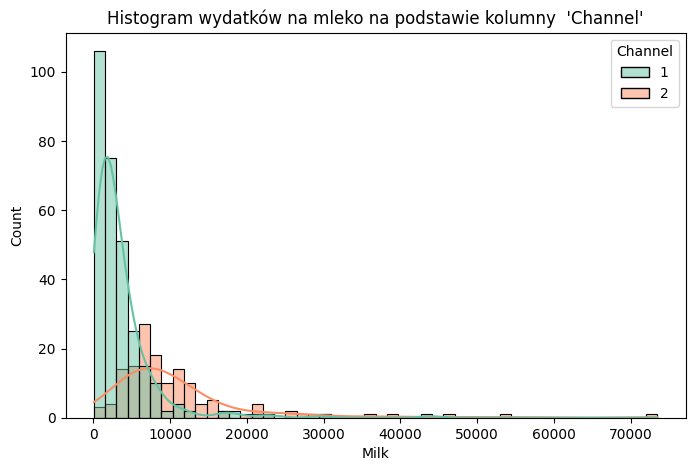

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=dane, x='Milk', hue='Channel', kde=True, palette='Set2')
plt.title("Histogram wydatków na mleko na podstawie kolumny  'Channel'")
plt.show()

	2.3. Utworzenie mapy skupień korelacji między wydatkami na różne kategorie.


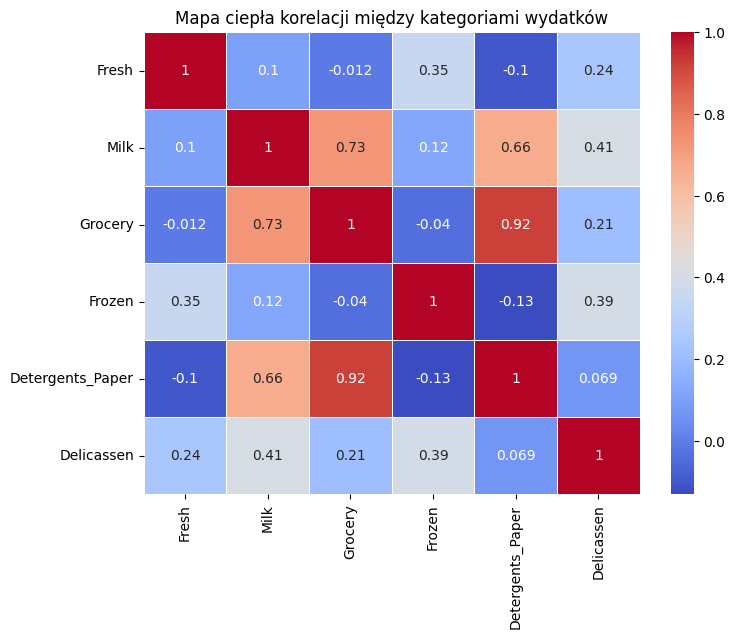

In [ ]:
correlation_matrix = dane.drop(['Channel', 'Region'], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Mapa ciepła korelacji między kategoriami wydatków")
plt.show()

	2.4. Utworzenie wykresu porównawczgo składającego się z macierzy par wszystkich zmiennych, różnicowanych na podstawie kolumny 'Region'.

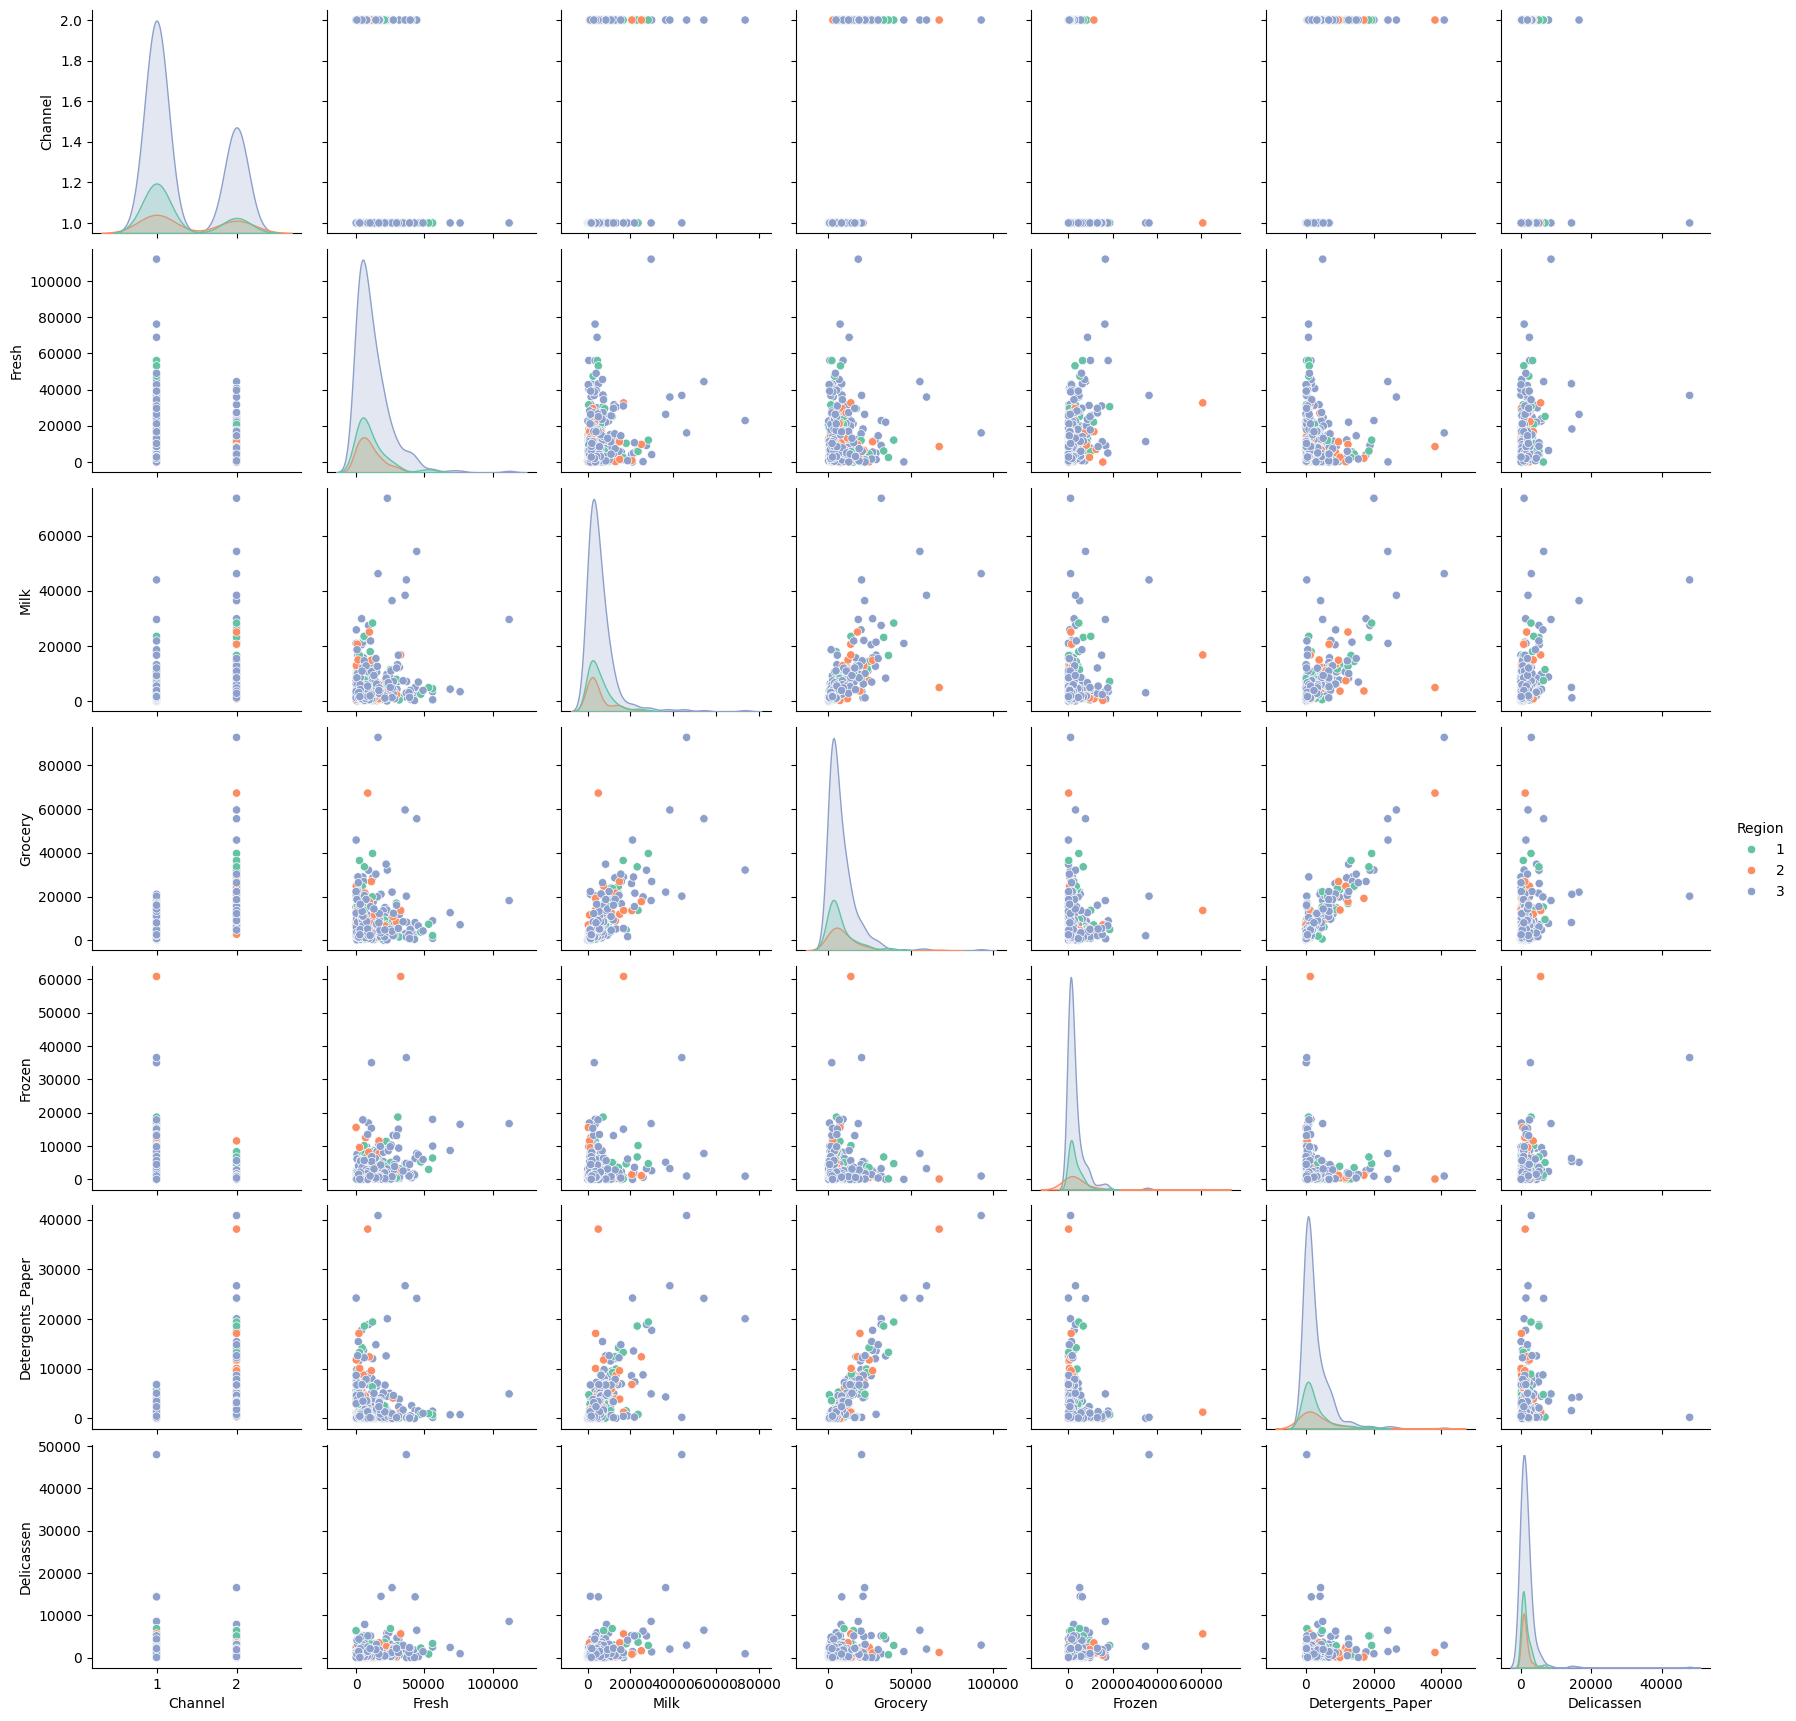

In [ ]:
sns.pairplot(dane,hue='Region',palette='Set2')

2.4. Standaryzacja

In [ ]:

standaryzacja= pd.DataFrame(dane)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(standaryzacja)
print(scaled_X)

[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


2.5. Użycie DBSCAN i pętli for, aby utworzyć różne modele testujące różne wartości epsilon. Ustawić min_samples na 2-krotność liczby funkcji. W pętli należy śledzić i rejestrować odsetek punktów, które stanowią wartości odstające. Dla porównania, rozwiązania do testowania wykorzystują następujący zakres wartości epsilon: np.linspace(0.001,3,50).

In [ ]:
epsilons = np.linspace(0.001, 3, 50)

outlier_percentages = []

for epsilon in epsilons:
    dbscan = DBSCAN(eps=epsilon, min_samples=2 * scaled_X.shape[1])

    dbscan.fit(scaled_X)

    n_outliers = np.sum(dbscan.labels_ == -1)

    outliers = (n_outliers / len(scaled_X)) * 100
    outlier_percentages.append(outliers)


2.6. Utworzenie wykresu liniowego procentu punktów odstających w funkcji wybranej wartości epsilon.

Text(0.5, 1.0, 'Wykres punktów odstających')

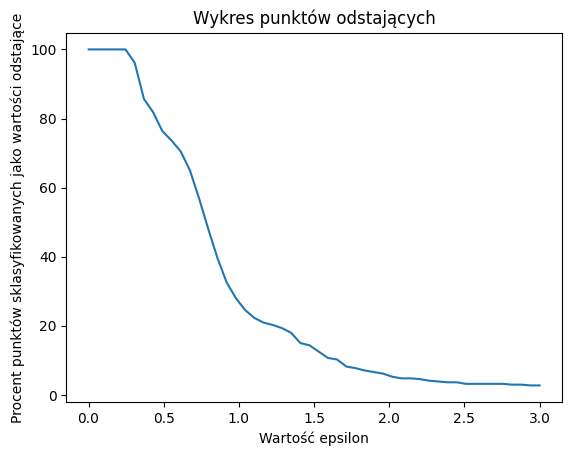

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percentages)
plt.ylabel("Procent punktów sklasyfikowanych jako wartości odstające")
plt.xlabel("Wartość epsilon")
plt.title('Wykres punktów odstających')

2.7. W oparciu o wykres utworzony w poprzednim zadaniu przeszkolić ponownie model DBSCAN z odpowiednią wartością epsilon.


In [ ]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(scaled_X)

DBSCAN(eps=1.5)

In [ ]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [ ]:
dbscan.labels_

array([ 0,  0, -1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0, -1,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  0, -1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1, -1,  1, -1,  1,  1,
        1,  1,  0,  1,  1

2.8. Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

Text(0.5, 1.0, 'Milk vs Grocery')

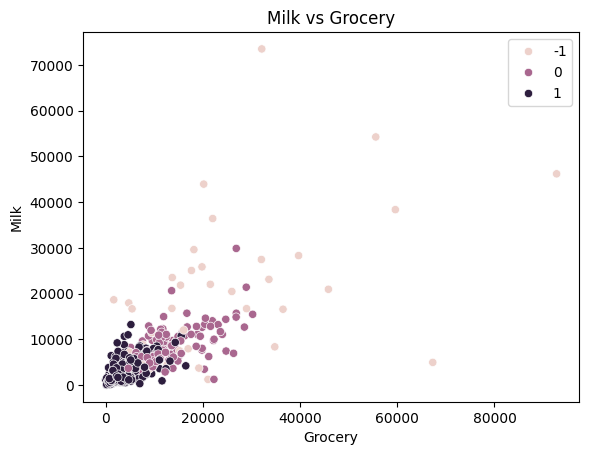

In [ ]:
sns.scatterplot(data=dane,x='Grocery',y='Milk',hue=dbscan.labels_)
plt.title('Milk vs Grocery')

2.9. Utworzenie wykresu punktowego 'Milk' vs 'Detergents Paper', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

Text(0.5, 1.0, 'Milk vs Detergents Paper')

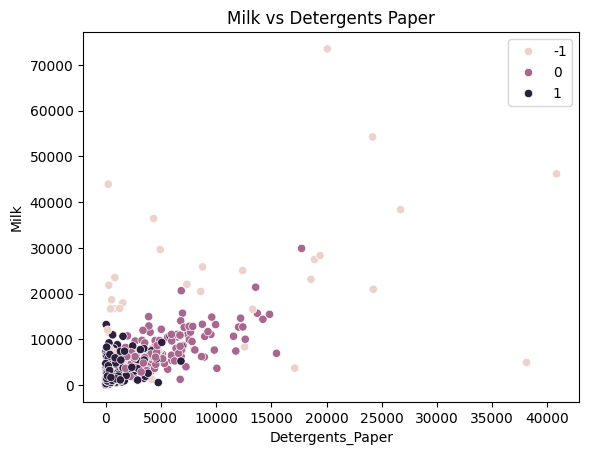

In [ ]:
sns.scatterplot(data=dane,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)
plt.title('Milk vs Detergents Paper')

	2.10. Utwórzyć nową kolumnę o nazwie "Labels".


In [ ]:
dane['Labels'] = dbscan.labels_

2.11. Usunąć kolumny 'Channel' i 'Region' , a następnie porównać średnią skupień i wartości odstających dla kwot wydatków w poszczególnych kategoriach.

In [ ]:
category=dane.drop(['Channel','Region'],axis=1)
categories_means = category.groupby('Labels').mean()

Text(0.5, 1.0, 'Mapa cieplna')

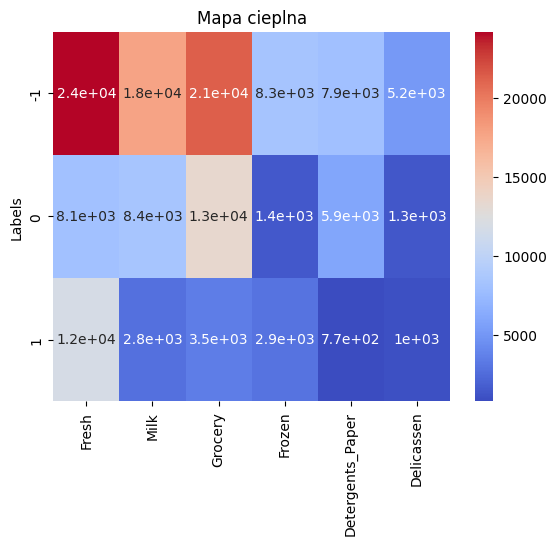

In [ ]:
sns.heatmap(categories_means,  cmap='coolwarm',annot=True)
plt.title('Mapa cieplna')

	2.12. W jakiej kategorii wydatków klastry różniły się najbardziej?


In [ ]:
cluster_diff = categories_means.max() - categories_means.min()
most_different_category = cluster_diff.idxmax()
print(f"Najbardziej różniąca się kategoria wydatków: {most_different_category}")

Najbardziej różniąca się kategoria wydatków: Grocery


### Zadanie 3

In [ ]:
dane1=pd.read_csv('Wholesale customers data.csv')

dane1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
np.set_printoptions(suppress=True)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized = scaler.fit_transform(dane1)
normalized

array([[1.        , 1.        , 0.11294004, ..., 0.0031063 , 0.0654272 ,
        0.02784731],
       [1.        , 1.        , 0.06289903, ..., 0.02854842, 0.08058985,
        0.03698373],
       [1.        , 1.        , 0.05662161, ..., 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [1.        , 1.        , 0.1295431 , ..., 0.00677142, 0.36346267,
        0.03888194],
       [0.        , 1.        , 0.091727  , ..., 0.01664914, 0.00404174,
        0.04426366],
       [0.        , 1.        , 0.02482434, ..., 0.00065742, 0.01161082,
        0.00102211]])

2.5 Użycie DBSCAN i pętli for, aby utworzyć różne modele testujące różne wartości epsilon. Ustawić min_samples na 2-krotność liczby funkcji. W pętli należy śledzić i rejestrować odsetek punktów, które stanowią wartości odstające. Dla porównania, rozwiązania do testowania wykorzystują następujący zakres wartości epsilon: np.linspace(0.001,3,50).

In [ ]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*normalized.shape[1])
    dbscan.fit(normalized)

    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

2.6. Utworzenie wykresu liniowego procentu punktów odstających w funkcji wybranej wartości epsilon.

Text(0.5, 1.0, 'Wykres liniowy punktów odstjących')

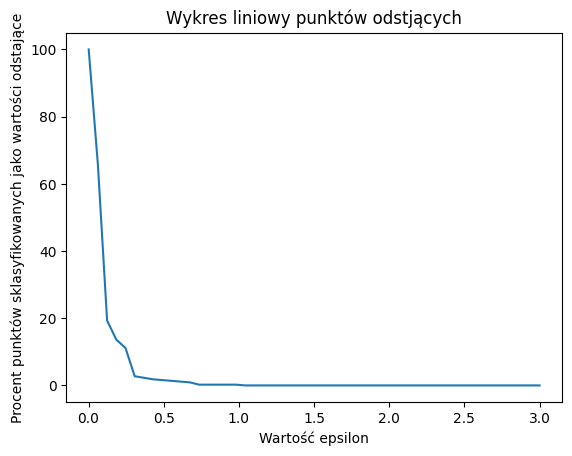

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Procent punktów sklasyfikowanych jako wartości odstające")
plt.xlabel("Wartość epsilon")
plt.title('Wykres liniowy punktów odstjących')

2.7. W oparciu o wykres utworzony w poprzednim zadaniu przeszkolić ponownie model DBSCAN z odpowiednią wartością epsilon. UWAGA!! Proszę nie wybierać wartości eps=2.


In [ ]:
dbscan1 = DBSCAN(eps=1)
dbscan1.fit(normalized)

DBSCAN(eps=1)

2.8. Utworzenie wykresu punktowego 'Milk' vs 'Grocery', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

Text(0.5, 1.0, 'Milk vs Grocery')

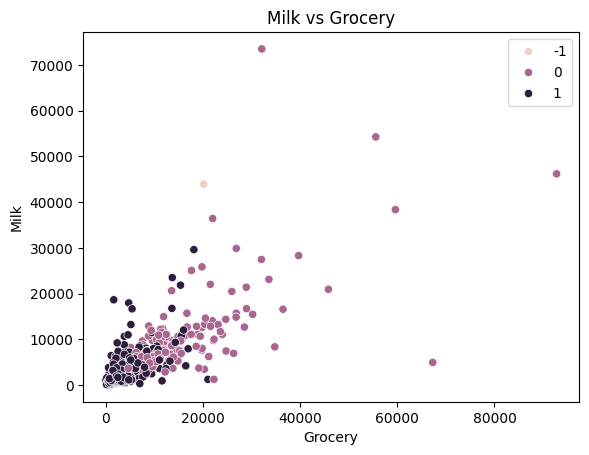

In [ ]:
sns.scatterplot(data=dane1,x='Grocery',y='Milk',hue=dbscan1.labels_)
plt.title('Milk vs Grocery')

2.9. Utworzenie wykresu punktowego 'Milk' vs 'Detergents Paper', gdzie punkty będą różnicowane za pomocą etykiet dbscan.

Text(0.5, 1.0, 'Milk vs Detergents_Paper')

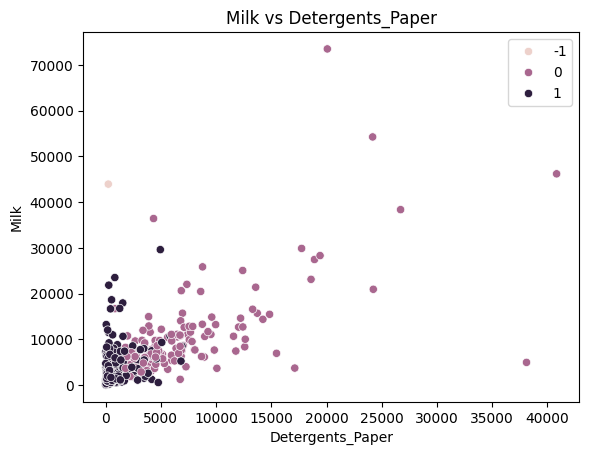

In [ ]:
sns.scatterplot(data=dane1,x='Detergents_Paper',y='Milk',hue=dbscan1.labels_)
plt.title('Milk vs Detergents_Paper')

	2.10. Utwórzyć nową kolumnę o nazwie "Labels".


In [ ]:
dane1['Labels'] = dbscan1.labels_

2.11. Usunąć kolumny 'Channel' i 'Region' , a następnie porównać średnią skupień i wartości odstających dla kwot wydatków w poszczególnych kategoriach.

In [ ]:
category1=dane1.drop(['Channel','Region'],axis=1)
categories_means1 = category1.groupby('Labels').mean()


Text(0.5, 1.0, 'Mapa cieplna')

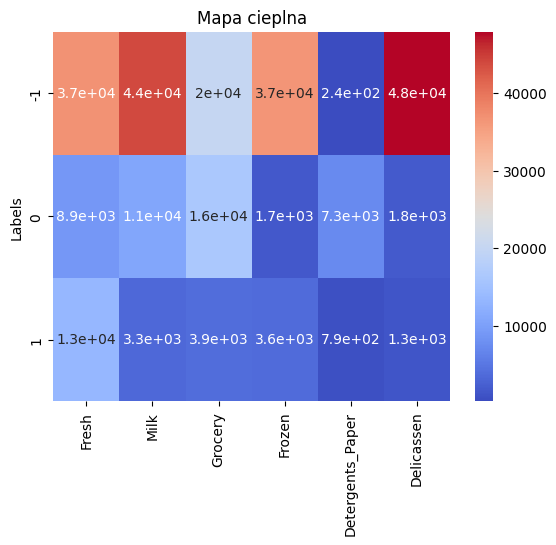

In [ ]:
sns.heatmap(categories_means1,  cmap='coolwarm',annot=True)
plt.title('Mapa cieplna')

	2.12. W jakiej kategorii wydatków klastry różniły się najbardziej?


In [ ]:
cluster_diff = categories_means1.max() - categories_means1.min()
most_different_category = cluster_diff.idxmax()
print(f"Najbardziej różniąca się kategoria wydatków: {most_different_category}")

Najbardziej różniąca się kategoria wydatków: Delicassen


Klastry róniły się najbardziej w kategorii 'Delicassen'